<a href="https://colab.research.google.com/github/jzyee/water_stress_proj/blob/master/Clustering/notebooks/deep_temporal_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> Drought identification using abnormality detection </b>

In [ ]:
! pip install --upgrade keras

     |████████████████████████████████| 174kB 2.9MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
% cd /content/gdrive/'My Drive'/water_stress_detection

/content/gdrive/My Drive/water_stress_detection


In [ ]:
#variable declaration

filename = 'MODIS_TS_EVI_EBTRN_Sites.csv'

df = pd.read_csv(filename)
df.head()

,alt,lat,lon,siteID,2000-02-18T00:00:00,2000-03-05T00:00:00,2000-03-21T00:00:00,2000-04-06T00:00:00,2000-04-22T00:00:00,2000-05-08T00:00:00,2000-05-24T00:00:00,2000-06-09T00:00:00,2000-06-25T00:00:00,2000-07-11T00:00:00,2000-07-27T00:00:00,2000-08-12T00:00:00,2000-08-28T00:00:00,2000-09-13T00:00:00,2000-09-29T00:00:00,2000-10-15T00:00:00,2000-10-31T00:00:00,2000-11-16T00:00:00,2000-12-02T00:00:00,2000-12-18T00:00:00,2001-01-01T00:00:00,2001-01-17T00:00:00,2001-02-02T00:00:00,2001-02-18T00:00:00,2001-03-06T00:00:00,2001-03-22T00:00:00,2001-04-07T00:00:00,2001-04-23T00:00:00,2001-05-09T00:00:00,2001-05-25T00:00:00,2001-06-10T00:00:00,2001-06-26T00:00:00,2001-07-12T00:00:00,2001-07-28T00:00:00,2001-08-13T00:00:00,2001-08-29T00:00:00,...,2017-09-30T00:00:00,2017-10-16T00:00:00,2017-11-01T00:00:00,2017-11-17T00:00:00,2017-12-03T00:00:00,2017-12-19T00:00:00,2018-01-01T00:00:00,2018-01-17T00:00:00,2018-02-02T00:00:00,2018-02-18T00:00:00,2018-03-06T00:00:00,2018-03-22T00:00:00,2018-04-07T00:00:00,2018-04-23T00:00:00,2018-05-09T00:00:00,2018-05-25T00:00:00,2018-06-10T00:00:00,2018-06-26T00:00:00,2018-07-12T00:00:00,2018-07-28T00:00:00,2018-08-13T00:00:00,2018-08-29T00:00:00,2018-09-14T00:00:00,2018-09-30T00:00:00,2018-10-16T00:00:00,2018-11-01T00:00:00,2018-11-17T00:00:00,2018-12-03T00:00:00,2018-12-19T00:00:00,2019-01-01T00:00:00,2019-01-17T00:00:00,2019-02-02T00:00:00,2019-02-18T00:00:00,2019-03-06T00:00:00,2019-03-22T00:00:00,2019-04-07T00:00:00,2019-04-23T00:00:00,2019-05-09T00:00:00,2019-05-25T00:00:00,2019-06-10T00:00:00
0,570,47.191442,6.277375,FS25,2930.0,2741.0,2759.0,2965.0,3103.0,5839.0,8273.0,7278.0,6472.0,7109.0,5608.0,5141.0,5480.0,4829.0,4302.0,3244.0,2849.0,2668.0,2916.0,2505.0,2428.0,2400.0,2597.0,2624.0,1977.0,2663.0,3755.0,3486.0,4420.0,7553.0,6986.0,7317.0,6979.0,6763.0,5853.0,5968.0,...,4447.0,2906.0,2729.0,2549.0,2362.0,3701.0,2479.0,3277.0,2481.0,2496.0,2007.0,2793.0,3528.0,5065.0,5597.0,6332.0,6434.0,5359.0,5528.0,5590.0,5162.0,4246.0,4468.0,4286.0,3574.0,2759.0,2534.0,2552.0,2384.0,2384.0,1916.0,2360.0,2552.0,3249.0,2703.0,3325.0,3906.0,5072.0,6466.0,5616.0
1,325,48.509078,6.704715,FS54a,2824.0,2610.0,2864.0,2901.0,4854.0,4945.0,6032.0,5644.0,6037.0,6471.0,5714.0,5354.0,5014.0,5239.0,5525.0,4208.0,3529.0,3874.0,3216.0,3031.0,2745.0,2968.0,3014.0,3578.0,2581.0,3048.0,2454.0,4361.0,7437.0,6248.0,6190.0,6901.0,6974.0,6395.0,6089.0,882.0,...,5153.0,4080.0,4406.0,3477.0,4297.0,1802.0,2938.0,1378.0,3634.0,2730.0,3179.0,2805.0,5426.0,7028.0,7397.0,6904.0,6496.0,5874.0,6664.0,6411.0,5946.0,5241.0,5990.0,5808.0,4918.0,2975.0,2942.0,2702.0,1412.0,2183.0,2775.0,2807.0,2604.0,2898.0,2757.0,3235.0,5100.0,8108.0,7072.0,5839.0
2,145,49.205399,3.126344,FS02,2808.0,2217.0,2236.0,2437.0,6410.0,6248.0,6332.0,6522.0,6885.0,6287.0,6112.0,5450.0,5564.0,4777.0,5583.0,4151.0,2836.0,2738.0,2650.0,2459.0,1535.0,2636.0,2137.0,2586.0,1986.0,2219.0,2427.0,5080.0,6234.0,6934.0,7426.0,7114.0,5895.0,5966.0,6435.0,6920.0,...,4371.0,4510.0,3478.0,2693.0,2589.0,3040.0,2371.0,2472.0,1370.0,2759.0,2694.0,2769.0,4852.0,6524.0,6399.0,6447.0,6941.0,6019.0,5711.0,6083.0,5590.0,5059.0,4918.0,4748.0,4717.0,3868.0,2989.0,2851.0,2237.0,1804.0,2229.0,2286.0,2315.0,3084.0,2547.0,4822.0,5898.0,6292.0,6741.0,6262.0
3,138,49.323585,2.875263,FS60,2293.0,2116.0,2574.0,2546.0,6080.0,6194.0,6218.0,6225.0,6461.0,5913.0,5401.0,5374.0,5598.0,5245.0,5601.0,4309.0,3094.0,2431.0,2044.0,2465.0,2898.0,2373.0,2156.0,2561.0,1954.0,3151.0,2490.0,2844.0,6065.0,6993.0,7318.0,7031.0,5840.0,6025.0,6503.0,6868.0,...,4237.0,4227.0,3994.0,2713.0,2811.0,3810.0,2820.0,2556.0,1731.0,2765.0,2637.0,2782.0,4041.0,6251.0,6983.0,7085.0,6743.0,6344.0,5793.0,6124.0,5642.0,5266.0,5158.0,4823.0,5081.0,3571.0,2506.0,2921.0,2542.0,1702.0,2888.0,2338.0,2391.0,3307.0,2616.0,3540.0,6419.0,6285.0,6275.0,7015.0
4,87,55.605000,13.799000,FL,-235.0,2664.0,2397.0,2462.0,4790.0,4802.0,6462.0,5340.0,5997.0,5443.0,5636.0,2054.0,4396.0,4251.0,4614.0,1652.0,3576.0,1978.0,777.0,1986.0,2253.0,496.0,2236.0,2375.

In [ ]:
def reformat_modis_df(modis_df):
  modis_loc_df = modis_df.iloc[:,3:]
  modis_loc_df.index = modis_loc_df.iloc[:,0]
  modis_loc_df = modis_loc_df.iloc[:,1:]
  modis_loc_T = modis_loc_df.T
  modis_loc_T.index = pd.to_datetime(modis_loc_T.index)
  # modis_loc_T.plot(figsize=(25,10))

  # resample for monthly means
  modis_loc_T = modis_loc_T.resample('M').mean()

  ##GLDAS data retried from GEE sets the monthly avg on the first day of the month
  modis_loc_T.index = modis_loc_T.index.map(lambda t: t.replace(day=1))


  return(modis_loc_T)

mean_modis = reformat_modis_df(df)

In [ ]:
mean_modis

siteID,FS25,FS54a,FS02,FS60,FL,FR,Bnik,Bgar,Bcas,Bgov,Bdra,Bmon,Btjn,GERM174,GERM215,GERM151,ITAL039,ITAL036,SWIT259,SWIT345,SWIT295,s097,s033,s103,s106,E17,E45,E10,E09,E46,E06,E07,E39,E38,E31,E30,E50,E20,E18,E13,...,LLSR,OGMS,SSAK,WMFH,LR38,FS55,OAH,HSBB,HSKM,ITAL037,ROM_PAU,Bbuk,KA,E19,SAMA,OGLC,NGEW,KHKF,KHLF,KHLW,GERM184,GERM182,SeL,Ses,VERM11,VERM10,UnS,UnL,GERM148,GERM152,GERM167,GERM164,GERM212,GERM211,WHSB,WHSG,UK32,BWS,VERM19,VERM17
2000-02-01,2930.0,2824.0,2808.0,2293.0,-235.0,670.0,1729.0,3169.0,560.0,1466.0,1059.0,1888.0,1698.0,2749.0,-203.0,760.0,3512.0,3124.0,561.0,1748.0,2344.0,1987.0,2073.0,2232.0,2410.0,1267.0,3541.0,2558.0,2677.0,664.0,2393.0,2326.0,2757.0,2671.0,1997.0,2151.0,2583.0,2669.0,2851.0,2286.0,...,2264.0,1337.0,2562.0,2502.0,1635.0,2453.0,1825.0,1343.0,1731.0,2788.0,2494.0,2034.0,2166.0,3342.0,132.0,1844.0,1496.0,2375.0,2375.0,2375.0,2674.0,2674.0,-174.0,-174.0,1394.0,1394.0,230.0,230.0,1693.0,1693.0,786.0,786.0,2312.0,2312.0,2323.0,2323.0,2790.0,2790.0,94.0,94.0
2000-03-01,2750.0,2737.0,2226.5,2345.0,2530.5,2727.5,1935.0,2676.5,2501.0,1449.5,2294.0,1615.0,1699.5,2273.0,2369.5,1072.0,3892.5,3260.5,1486.0,1923.0,2480.0,1815.0,2511.5,2906.0,2249.5,2758.0,3683.0,2519.5,2797.0,2547.5,2497.0,2281.0,2266.0,2558.5,1694.5,2257.5,2931.0,1935.5,2845.5,2434.5,...,2593.5,658.0,1971.0,1845.0,1917.0,2412.0,3606.5,3009.5,1762.5,4432.5,1343.0,2498.0,2419.0,3034.0,1589.0,2435.0,1417.5,2638.0,2638.0,2638.0,2630.0,2630.0,2220.5,2220.5,1893.0,1893.0,2141.5,2141.5,2041.0,2041.0,1707.5,1707.5,2200.0,2200.0,2351.0,2351.0,4632.0,4632.0,606.0,606.0
2000-04-01,3034.0,3877.5,4423.5,4313.0,3626.0,3147.0,5193.0,6690.0,2938.0,5563.0,4505.0,2380.5,1783.5,1807.5,4156.0,2095.0,4729.5,4677.5,2207.0,3040.0,3733.5,4699.5,4904.5,3825.0,4098.0,3519.5,5163.0,2781.5,3744.5,2916.5,3941.5,3422.0,4387.0,4440.5,4294.0,2451.0,2650.5,3039.0,2642.5,3907.0,...,4110.5,1366.5,2797.5,2915.5,3854.5,4421.5,4520.5,2106.0,3950.5,5339.5,2569.0,6152.5,2515.0,3960.5,2940.5,2713.5,1931.0,3108.5,3108.5,3108.5,4045.0,4045.0,2821.5,2821.5,4599.0,4599.0,3609.0,3609.0,3357.5,3357.5,3911.5,3911.5,3002.5,3002.5,2802.5,2802.5,4008.5,4008.5,1998.5,1998.5
2000-05-01,7056.0,5488.5,6290.0,6206.0,5632.0,4475.5,7045.5,7676.5,6149.5,7363.5,7164.5,3784.5,4060.0,5611.5,4880.0,1814.0,5651.5,5094.5,6145.0,5774.5,6485.0,6059.5,7365.0,6359.5,5953.5,6791.0,6627.5,5591.5,6034.0,5815.5,6659.0,6712.5,6892.0,6621.0,7221.0,7299.0,3511.5,3511.5,3770.5,7097.5,...,5371.0,3069.0,5073.0,4892.0,7559.0,5969.5,5084.0,6023.5,6100.5,4930.0,5684.0,7637.5,6579.0,4405.5,5104.0,5095.0,3440.0,3410.0,3410.0,3410.0,5302.0,5302.0,3030.0,3030.0,7215.0,7215.0,4830.5,4830.5,5624.5,5624.5,6664.0,6664.0,4458.0,4458.0,4168.5,4168.5,5408.5,5408.5,3026.0,3026.0
2000-06-01,6875.0,5840.5,6703.5,6343.0,5668.5,5226.0,6523.5,7610.0,6100.0,7093.5,6391.5,5763.0,6268.5,5840.0,3756.0,1254.0,4926.5,6275.0,6256.0,6564.0,6440.0,7143.0,7657.0,6656.5,5683.0,5995.5,5212.0,5443.0,5345.0,6171.0,6751.5,6573.0,5459.5,6231.5,7050.5,7233.0,3457.0,5081.5,5452.0,6216.5,...,4880.0,3489.0,5106.0,5522.0,6960.0,6701.0,6548.5,5085.0,4246.5,5610.5,6502.5,6844.5,5872.5,5835.5,5105.0,5078.5,4229.5,3931.5,3931.5,3931.5,6395.0,6395.0,3001.5,3001.5,7564.5,7564.5,5130.0,5130.0,3612.0,3612.0,5288.0,5288.0,4299.5,4299.5,4477.5,4477.5,3231.5,3231.5,3894.0,3894.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-01,2456.0,2705.5,2300.5,2364.5,3162.0,2726.0,1910.0,2764.5,1117.5,1650.0,1198.5,2189.5,1146.0,2470.5,2110.5,-720.5,3278.0,1368.5,992.0,1853.5,1916.5,2240.0,2113.5,2755.0,2534.0,1298.5,3334.0,2548.0,2487.0,753.5,1872.0,2472.0,2564.0,2057.5,2158.5,2527.5,2955.5,2765.5,3664.0,2199.5,...,2381.5,1249.0,2898.0,2467.5,1697.5,2239.5,2676.5,1545.0,1990.5,1892.0,1305.

# installing DeepTemporalClustering

In [ ]:
! git clone https://github.com/FlorentF9/DeepTemporalClustering.git

Cloning into 'DeepTemporalClustering'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 41 (delta 18), reused 34 (delta 14), pack-reused 0
Unpacking objects: 100% (41/41), done.


<b>P.S :</b> installed on 22/6/20

hash of latest commit on 22/6/20:
- 702f24c9507b5727509623993258205838a2f3e7

for Replicability next time: 

>git clone https://github.com/FlorentF9/DeepTemporalClustering.git
cd DeepTemporalClustering
git checkout 702f24c9507b5727509623993258205838a2f3e7


In [ ]:
! pip install tslearn

     |████████████████████████████████| 778kB 2.9MB/s 


In [ ]:
! python3 DeepTemporalClustering/DeepTemporalClustering.py --help

Using TensorFlow backend.
2020-06-22 08:17:50.076741: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
usage: DeepTemporalClustering.py [-h] [--dataset DATASET]
                                 [--ae_weights AE_WEIGHTS]
                                 [--n_clusters N_CLUSTERS]
                                 [--n_filters N_FILTERS]
                                 [--kernel_size KERNEL_SIZE]
                                 [--strides STRIDES] [--pool_size POO

# experimenting with deep temport clustering

In [ ]:
from tslearn.datasets import UCR_UEA_datasets
import matplotlib.pyplot as plt
import os
import numpy as np
from time import time

In [ ]:
# Dataset helper function
#from DeepTemporalClustering import * 
from DeepTemporalClustering.datasets import load_data
from DeepTemporalClustering.DeepTemporalClustering import DTC
from DeepTemporalClustering.metrics import *

# Checking what the default data available

In [ ]:
ucr = UCR_UEA_datasets()

In [ ]:
X_train, y_train, X_test, y_test = ucr.load_dataset('CBF')

## shape of data

In [ ]:
X_train.shape

(30, 128, 1)

## example of the available data

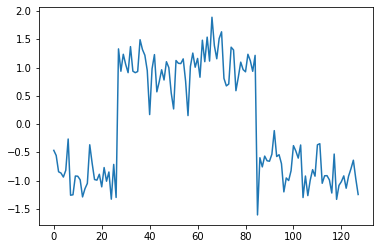

In [ ]:
plt.plot(X_train.reshape(30,128)[0])

## training from code

In [ ]:
# arguments for the training

# have used the predix input_ just to make sure there are no clash with 
# variable names (in case you were wondering)

input_dataset = 'CBF'
input_weights = None
input_n_clusters = None
input_n_filters = 50
input_kernel_size = 10
input_strides = 1
input_pool_size = 32
input_n_units = [50, 1]
input_gamma = 1.0
input_alpha = 1.0
input_dist_metric = 'eucl' #choices include ['eucl', 'cid', 'cor', 'acf']
input_cluster_init = 'kmeans' #choices include ['kmeans', 'hierarchical']
input_heatmap = True #train heat map generating network
input_pretrain_epochs = 10
input_epochs = 100
input_eval_epochs = 1
input_save_epochs = 10
input_batch_size = 64
input_tol = 0.001
input_patience = 5
input_finetune_heatmap_at_epoch = 8
input_initial_heatmap_loss_weight = 0.1
input_final_heatmap_loss_weight = 0.9
input_save_dir = 'results/tmp'


In [ ]:
# Create save directory if not exists
if not os.path.exists(input_save_dir):
    os.makedirs(input_save_dir)

In [ ]:
# Load data

#the (None, None) dataset is where validation data can be entered
(X_train, y_train), (X_val, y_val) = load_data(input_dataset) , (None,None)

In [ ]:
# Find number of clusters
if input_n_clusters is None:
    input_n_clusters = len(np.unique(y_train))

In [ ]:
# Set default values
pretrain_optimizer = 'adam'

In [ ]:
# Instantiate model
dtc = DTC(n_clusters=input_n_clusters,
          input_dim=X_train.shape[-1],
          timesteps=X_train.shape[1],
          n_filters=input_n_filters,
          kernel_size=input_kernel_size,
          strides=input_strides,
          pool_size=input_pool_size,
          n_units=input_n_units,
          alpha=input_alpha,
          dist_metric=input_dist_metric,
          cluster_init=input_cluster_init,
          heatmap=input_heatmap)

In [ ]:
# Initialize model
optimizer = 'adam'
dtc.initialize()
dtc.model.summary()
dtc.compile(gamma=input_gamma, optimizer=optimizer, 
            initial_heatmap_loss_weight=input_initial_heatmap_loss_weight,
            final_heatmap_loss_weight=input_final_heatmap_loss_weight)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_seq (InputLayer)          [(None, 128, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 128, 50)      550         input_seq[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 128, 50)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 4, 50)        0           leaky_re_lu[0][0]                
______________________________________________________________________________________________

In [ ]:
# Load pre-trained AE weights or pre-train

# needs to use GPU or wont work/run

if input_weights is None and input_pretrain_epochs > 0:
    dtc.pretrain(X=X_train, optimizer=pretrain_optimizer,
                  epochs=input_pretrain_epochs, batch_size=input_batch_size,
                  save_dir=input_save_dir)
elif input_ae_weights is not None:
    dtc.load_ae_weights(input_ae_weights)

Pretraining...
Epoch 1/10
15/15 [==============================] - 0s 18ms/step - loss: 0.9598
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 0.8235
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 0.6746
Epoch 4/10
15/15 [==============================] - 0s 9ms/step - loss: 0.5990
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 0.5711
Epoch 6/10
15/15 [==============================] - 0s 10ms/step - loss: 0.5570
Epoch 7/10
15/15 [==============================] - 0s 10ms/step - loss: 0.5480
Epoch 8/10
15/15 [==============================] - 0s 10ms/step - loss: 0.5405
Epoch 9/10
15/15 [==============================] - 0s 10ms/step - loss: 0.5343
Epoch 10/10
15/15 [==============================] - 0s 10ms/step - loss: 0.5292
Pretraining time:  10.481673240661621
Pretrained weights are saved to results/tmp/ae_weights-epoch10.h5


In [ ]:
# Initialize clusters
dtc.init_cluster_weights(X_train)

Initializing cluster...
Done!


In [ ]:
# Fit model
t0 = time()
dtc.fit(X_train, y_train, X_val, y_val, input_epochs, input_eval_epochs, 
        input_save_epochs, input_batch_size,
        input_tol, input_patience, input_finetune_heatmap_at_epoch, 
        input_save_dir)
print('Training time: ', (time() - t0))

Training for 100 epochs.
Evaluating every 1 and saving model every 10 epochs.
epoch 0
[Train] - Lr=0.526882, Lc=0.023175 - total loss=0.561536
[Train] - Acc=0.682796, Pur=0.682796, NMI=0.373571, ARI=0.341951
Saved model to: results/tmp/DTC_model_0.h5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 1
[Train] - Lr=0.541488, Lc=0.027157 - total loss=0.582275
[Train] - Acc=0.683871, Pur=0.683871, NMI=0.372542, ARI=0.343958


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 2
[Train] - Lr=0.527733, Lc=0.028588 - total loss=0.570166
[Train] - Acc=0.691398, Pur=0.691398, NMI=0.370939, ARI=0.349537


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 3
[Train] - Lr=0.523473, Lc=0.029230 - total loss=0.566899
[Train] - Acc=0.688172, Pur=0.688172, NMI=0.372651, ARI=0.345920


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 4
[Train] - Lr=0.521791, Lc=0.031844 - total loss=0.568944
[Train] - Acc=0.689247, Pur=0.689247, NMI=0.365049, ARI=0.344946


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 5
[Train] - Lr=0.519296, Lc=0.033684 - total loss=0.569275
[Train] - Acc=0.688172, Pur=0.688172, NMI=0.361423, ARI=0.343881


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 6
[Train] - Lr=0.517696, Lc=0.035971 - total loss=0.571071
[Train] - Acc=0.686022, Pur=0.686022, NMI=0.359153, ARI=0.342944


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 7
[Train] - Lr=0.516027, Lc=0.038133 - total loss=0.572623
[Train] - Acc=0.678495, Pur=0.678495, NMI=0.354434, ARI=0.337329


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 8
[Train] - Lr=0.513270, Lc=0.040157 - total loss=0.572986
[Train] - Acc=0.681720, Pur=0.681720, NMI=0.357293, ARI=0.341748


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 9
[Train] - Lr=0.512087, Lc=0.042857 - total loss=0.575898
[Train] - Acc=0.682796, Pur=0.682796, NMI=0.358738, ARI=0.344232


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 10
[Train] - Lr=0.509341, Lc=0.044903 - total loss=0.751552
[Train] - Acc=0.683871, Pur=0.683871, NMI=0.358743, ARI=0.346870
Saved model to: results/tmp/DTC_model_10.h5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 11
[Train] - Lr=0.515378, Lc=0.047774 - total loss=0.757544
[Train] - Acc=0.689247, Pur=0.689247, NMI=0.354409, ARI=0.347849


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 12
[Train] - Lr=0.521038, Lc=0.050415 - total loss=0.762853
[Train] - Acc=0.688172, Pur=0.688172, NMI=0.359731, ARI=0.350039


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 13
[Train] - Lr=0.528097, Lc=0.053999 - total loss=0.773233
[Train] - Acc=0.679570, Pur=0.679570, NMI=0.344872, ARI=0.338210


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 14
[Train] - Lr=0.534744, Lc=0.056179 - total loss=0.770447
[Train] - Acc=0.682796, Pur=0.682796, NMI=0.361461, ARI=0.352509


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 15
[Train] - Lr=0.540370, Lc=0.059442 - total loss=0.775644
[Train] - Acc=0.679570, Pur=0.679570, NMI=0.353908, ARI=0.346401


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 16
[Train] - Lr=0.545771, Lc=0.063179 - total loss=0.784940
[Train] - Acc=0.676344, Pur=0.676344, NMI=0.354338, ARI=0.346257


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 17
[Train] - Lr=0.553140, Lc=0.065210 - total loss=0.781463
[Train] - Acc=0.678495, Pur=0.678495, NMI=0.352742, ARI=0.345472


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 18
[Train] - Lr=0.558955, Lc=0.066789 - total loss=0.779056
[Train] - Acc=0.678495, Pur=0.678495, NMI=0.349320, ARI=0.343224


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 19
[Train] - Lr=0.559541, Lc=0.069613 - total loss=0.784629
[Train] - Acc=0.673118, Pur=0.673118, NMI=0.349745, ARI=0.341863


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 20
[Train] - Lr=0.566988, Lc=0.071424 - total loss=0.783647
[Train] - Acc=0.673118, Pur=0.673118, NMI=0.347704, ARI=0.340456
Saved model to: results/tmp/DTC_model_20.h5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 21
[Train] - Lr=0.567352, Lc=0.073333 - total loss=0.786654
[Train] - Acc=0.675269, Pur=0.675269, NMI=0.349635, ARI=0.342469


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 22
[Train] - Lr=0.563114, Lc=0.074244 - total loss=0.784199
[Train] - Acc=0.674194, Pur=0.674194, NMI=0.348675, ARI=0.341751


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 23
[Train] - Lr=0.568599, Lc=0.075005 - total loss=0.780408
[Train] - Acc=0.670968, Pur=0.670968, NMI=0.345663, ARI=0.338303


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 24
[Train] - Lr=0.568624, Lc=0.075831 - total loss=0.776951
[Train] - Acc=0.669892, Pur=0.669892, NMI=0.346299, ARI=0.338814


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 25
[Train] - Lr=0.572145, Lc=0.077760 - total loss=0.780563
[Train] - Acc=0.667742, Pur=0.667742, NMI=0.346930, ARI=0.339378


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 26
[Train] - Lr=0.570442, Lc=0.079903 - total loss=0.792640
[Train] - Acc=0.672043, Pur=0.672043, NMI=0.346777, ARI=0.341100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 27
[Train] - Lr=0.575973, Lc=0.078986 - total loss=0.782687
[Train] - Acc=0.669892, Pur=0.669892, NMI=0.345323, ARI=0.340118


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 28
[Train] - Lr=0.575554, Lc=0.082212 - total loss=0.798074
[Train] - Acc=0.669892, Pur=0.669892, NMI=0.349764, ARI=0.343279


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 29
[Train] - Lr=0.579500, Lc=0.081925 - total loss=0.785050
[Train] - Acc=0.666667, Pur=0.666667, NMI=0.355370, ARI=0.347017


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 30
[Train] - Lr=0.577044, Lc=0.082687 - total loss=0.786683
[Train] - Acc=0.668817, Pur=0.668817, NMI=0.351556, ARI=0.345297
Saved model to: results/tmp/DTC_model_30.h5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 31
[Train] - Lr=0.577256, Lc=0.084313 - total loss=0.792915
[Train] - Acc=0.666667, Pur=0.666667, NMI=0.349613, ARI=0.342252


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 32
[Train] - Lr=0.582563, Lc=0.084586 - total loss=0.790263
[Train] - Acc=0.663441, Pur=0.663441, NMI=0.351039, ARI=0.343493


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 33
[Train] - Lr=0.577362, Lc=0.085230 - total loss=0.791315
[Train] - Acc=0.663441, Pur=0.663441, NMI=0.352021, ARI=0.344020


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 34
[Train] - Lr=0.585052, Lc=0.086383 - total loss=0.795110
[Train] - Acc=0.666667, Pur=0.666667, NMI=0.351215, ARI=0.345475


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 35
[Train] - Lr=0.579291, Lc=0.086990 - total loss=0.795679
[Train] - Acc=0.659140, Pur=0.659140, NMI=0.350822, ARI=0.342417


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 36
[Train] - Lr=0.584650, Lc=0.088330 - total loss=0.799280
[Train] - Acc=0.659140, Pur=0.659140, NMI=0.350307, ARI=0.342123


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 37
[Train] - Lr=0.585112, Lc=0.088225 - total loss=0.794888
[Train] - Acc=0.658065, Pur=0.658065, NMI=0.354571, ARI=0.345500


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 38
[Train] - Lr=0.586459, Lc=0.089538 - total loss=0.800068
[Train] - Acc=0.659140, Pur=0.659140, NMI=0.357718, ARI=0.348771


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 39
[Train] - Lr=0.588109, Lc=0.089949 - total loss=0.798515
[Train] - Acc=0.661290, Pur=0.661290, NMI=0.365516, ARI=0.354501


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 40
[Train] - Lr=0.591272, Lc=0.089781 - total loss=0.795988
[Train] - Acc=0.659140, Pur=0.659140, NMI=0.363262, ARI=0.353143
Saved model to: results/tmp/DTC_model_40.h5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 41
[Train] - Lr=0.587589, Lc=0.091378 - total loss=0.803878
[Train] - Acc=0.661290, Pur=0.661290, NMI=0.364739, ARI=0.354655


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 42
[Train] - Lr=0.591902, Lc=0.091591 - total loss=0.801943
[Train] - Acc=0.660215, Pur=0.660215, NMI=0.362023, ARI=0.351721


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 43
[Train] - Lr=0.588256, Lc=0.092837 - total loss=0.810146
[Train] - Acc=0.660215, Pur=0.660215, NMI=0.362581, ARI=0.351539


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 44
[Train] - Lr=0.589608, Lc=0.092378 - total loss=0.805469
[Train] - Acc=0.660215, Pur=0.660215, NMI=0.362581, ARI=0.351539
Assignment changes 0.0 < 0.001 tolerance threshold. Patience: 1/5.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 45
[Train] - Lr=0.598794, Lc=0.094151 - total loss=0.813519
[Train] - Acc=0.659140, Pur=0.659140, NMI=0.356298, ARI=0.347448


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 46
[Train] - Lr=0.597650, Lc=0.094220 - total loss=0.811467
[Train] - Acc=0.660215, Pur=0.660215, NMI=0.365133, ARI=0.353583


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 47
[Train] - Lr=0.597319, Lc=0.094923 - total loss=0.812955
[Train] - Acc=0.658065, Pur=0.658065, NMI=0.360718, ARI=0.350082


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 48
[Train] - Lr=0.594103, Lc=0.095448 - total loss=0.813339
[Train] - Acc=0.658065, Pur=0.658065, NMI=0.363839, ARI=0.351958


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 49
[Train] - Lr=0.600643, Lc=0.095957 - total loss=0.813679
[Train] - Acc=0.658065, Pur=0.658065, NMI=0.363919, ARI=0.351514


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 50
[Train] - Lr=0.598800, Lc=0.096561 - total loss=0.815472
[Train] - Acc=0.659140, Pur=0.659140, NMI=0.369190, ARI=0.355075
Saved model to: results/tmp/DTC_model_50.h5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 51
[Train] - Lr=0.602296, Lc=0.097333 - total loss=0.818554
[Train] - Acc=0.658065, Pur=0.658065, NMI=0.368838, ARI=0.354726


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 52
[Train] - Lr=0.602462, Lc=0.097762 - total loss=0.818847
[Train] - Acc=0.653763, Pur=0.653763, NMI=0.363244, ARI=0.348128


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 53
[Train] - Lr=0.597126, Lc=0.098269 - total loss=0.819695
[Train] - Acc=0.652688, Pur=0.652688, NMI=0.364388, ARI=0.349114


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 54
[Train] - Lr=0.604983, Lc=0.099180 - total loss=0.826793
[Train] - Acc=0.659140, Pur=0.659140, NMI=0.373890, ARI=0.359286


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 55
[Train] - Lr=0.602760, Lc=0.099473 - total loss=0.826283
[Train] - Acc=0.658065, Pur=0.658065, NMI=0.371452, ARI=0.356747


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 56
[Train] - Lr=0.605216, Lc=0.099108 - total loss=0.822035
[Train] - Acc=0.654839, Pur=0.654839, NMI=0.366701, ARI=0.352452


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 57
[Train] - Lr=0.605435, Lc=0.100393 - total loss=0.830247
[Train] - Acc=0.655914, Pur=0.655914, NMI=0.370204, ARI=0.355180


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 58
[Train] - Lr=0.610265, Lc=0.101330 - total loss=0.834093
[Train] - Acc=0.654839, Pur=0.654839, NMI=0.368758, ARI=0.354119


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 59
[Train] - Lr=0.611758, Lc=0.100938 - total loss=0.831281
[Train] - Acc=0.652688, Pur=0.652688, NMI=0.367547, ARI=0.352596


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 60
[Train] - Lr=0.614850, Lc=0.102124 - total loss=0.840654
[Train] - Acc=0.656989, Pur=0.656989, NMI=0.373264, ARI=0.359201
Saved model to: results/tmp/DTC_model_60.h5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 61
[Train] - Lr=0.613011, Lc=0.101767 - total loss=0.835536
[Train] - Acc=0.655914, Pur=0.655914, NMI=0.372343, ARI=0.357954


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 62
[Train] - Lr=0.614451, Lc=0.101760 - total loss=0.832821
[Train] - Acc=0.654839, Pur=0.654839, NMI=0.372562, ARI=0.356612


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 63
[Train] - Lr=0.613833, Lc=0.102730 - total loss=0.839153
[Train] - Acc=0.653763, Pur=0.653763, NMI=0.371671, ARI=0.355387


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 64
[Train] - Lr=0.613473, Lc=0.102746 - total loss=0.835313
[Train] - Acc=0.652688, Pur=0.652688, NMI=0.370792, ARI=0.354174


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 65
[Train] - Lr=0.615030, Lc=0.102984 - total loss=0.835907
[Train] - Acc=0.650538, Pur=0.650538, NMI=0.368094, ARI=0.351917


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 66
[Train] - Lr=0.618040, Lc=0.103757 - total loss=0.838753
[Train] - Acc=0.651613, Pur=0.651613, NMI=0.369945, ARI=0.353518


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 67
[Train] - Lr=0.619333, Lc=0.103557 - total loss=0.837806
[Train] - Acc=0.649462, Pur=0.649462, NMI=0.369293, ARI=0.352099


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 68
[Train] - Lr=0.619327, Lc=0.104009 - total loss=0.840830
[Train] - Acc=0.649462, Pur=0.649462, NMI=0.369293, ARI=0.352099
Assignment changes 0.0 < 0.001 tolerance threshold. Patience: 1/5.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 69
[Train] - Lr=0.623204, Lc=0.104968 - total loss=0.846565
[Train] - Acc=0.650538, Pur=0.650538, NMI=0.369121, ARI=0.352872


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 70
[Train] - Lr=0.623491, Lc=0.104551 - total loss=0.842336
[Train] - Acc=0.649462, Pur=0.649462, NMI=0.368770, ARI=0.351714
Saved model to: results/tmp/DTC_model_70.h5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 71
[Train] - Lr=0.623851, Lc=0.105062 - total loss=0.842036
[Train] - Acc=0.650538, Pur=0.650538, NMI=0.373479, ARI=0.354505


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 72
[Train] - Lr=0.623531, Lc=0.105392 - total loss=0.843601
[Train] - Acc=0.650538, Pur=0.650538, NMI=0.373479, ARI=0.354505
Assignment changes 0.0 < 0.001 tolerance threshold. Patience: 1/5.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 73
[Train] - Lr=0.620778, Lc=0.105212 - total loss=0.842599
[Train] - Acc=0.646237, Pur=0.646237, NMI=0.371786, ARI=0.352608


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 74
[Train] - Lr=0.624091, Lc=0.105170 - total loss=0.842100
[Train] - Acc=0.646237, Pur=0.646237, NMI=0.367761, ARI=0.349160


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 75
[Train] - Lr=0.624121, Lc=0.105152 - total loss=0.842969
[Train] - Acc=0.647312, Pur=0.647312, NMI=0.373001, ARI=0.351947


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 76
[Train] - Lr=0.621036, Lc=0.105343 - total loss=0.845342
[Train] - Acc=0.646237, Pur=0.646237, NMI=0.373354, ARI=0.352748


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 77
[Train] - Lr=0.624300, Lc=0.105636 - total loss=0.843140
[Train] - Acc=0.646237, Pur=0.646237, NMI=0.372736, ARI=0.351735


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 78
[Train] - Lr=0.624853, Lc=0.106017 - total loss=0.847206
[Train] - Acc=0.647312, Pur=0.647312, NMI=0.373613, ARI=0.352952


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 79
[Train] - Lr=0.631868, Lc=0.105881 - total loss=0.842910
[Train] - Acc=0.647312, Pur=0.647312, NMI=0.373001, ARI=0.351947


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 80
[Train] - Lr=0.626345, Lc=0.105650 - total loss=0.842923
[Train] - Acc=0.640860, Pur=0.640860, NMI=0.369104, ARI=0.346813
Saved model to: results/tmp/DTC_model_80.h5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 81
[Train] - Lr=0.626491, Lc=0.105899 - total loss=0.845492
[Train] - Acc=0.644086, Pur=0.644086, NMI=0.372229, ARI=0.351349


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 82
[Train] - Lr=0.629289, Lc=0.105868 - total loss=0.844488
[Train] - Acc=0.644086, Pur=0.644086, NMI=0.374240, ARI=0.353091


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 83
[Train] - Lr=0.633645, Lc=0.106385 - total loss=0.845758
[Train] - Acc=0.645161, Pur=0.645161, NMI=0.374485, ARI=0.353273


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 84
[Train] - Lr=0.628939, Lc=0.106581 - total loss=0.851196
[Train] - Acc=0.645161, Pur=0.645161, NMI=0.374485, ARI=0.353273
Assignment changes 0.0 < 0.001 tolerance threshold. Patience: 1/5.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 85
[Train] - Lr=0.632348, Lc=0.106348 - total loss=0.843697
[Train] - Acc=0.644086, Pur=0.644086, NMI=0.372229, ARI=0.351349


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 86
[Train] - Lr=0.631099, Lc=0.106104 - total loss=0.843760
[Train] - Acc=0.644086, Pur=0.644086, NMI=0.370256, ARI=0.349619


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 87
[Train] - Lr=0.626793, Lc=0.105887 - total loss=0.843653
[Train] - Acc=0.640860, Pur=0.640860, NMI=0.369536, ARI=0.349115


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 88
[Train] - Lr=0.631083, Lc=0.105791 - total loss=0.840740
[Train] - Acc=0.640860, Pur=0.640860, NMI=0.375342, ARI=0.350727


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 89
[Train] - Lr=0.630513, Lc=0.106448 - total loss=0.845153
[Train] - Acc=0.643011, Pur=0.643011, NMI=0.370009, ARI=0.349439


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 90
[Train] - Lr=0.637756, Lc=0.106815 - total loss=0.845145
[Train] - Acc=0.644086, Pur=0.644086, NMI=0.372229, ARI=0.351349
Saved model to: results/tmp/DTC_model_90.h5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 91
[Train] - Lr=0.627454, Lc=0.105412 - total loss=0.840211
[Train] - Acc=0.637634, Pur=0.637634, NMI=0.369530, ARI=0.344716


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 92
[Train] - Lr=0.630385, Lc=0.106241 - total loss=0.847804
[Train] - Acc=0.643011, Pur=0.643011, NMI=0.372620, ARI=0.352211


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 93
[Train] - Lr=0.638995, Lc=0.106509 - total loss=0.845612
[Train] - Acc=0.644086, Pur=0.644086, NMI=0.372857, ARI=0.352377


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 94
[Train] - Lr=0.632327, Lc=0.106715 - total loss=0.848825
[Train] - Acc=0.644086, Pur=0.644086, NMI=0.372857, ARI=0.352377
Assignment changes 0.0 < 0.001 tolerance threshold. Patience: 1/5.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 95
[Train] - Lr=0.635866, Lc=0.107056 - total loss=0.847675
[Train] - Acc=0.644086, Pur=0.644086, NMI=0.372857, ARI=0.352377
Assignment changes 0.0 < 0.001 tolerance threshold. Patience: 2/5.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 96
[Train] - Lr=0.638613, Lc=0.107025 - total loss=0.846186
[Train] - Acc=0.643011, Pur=0.643011, NMI=0.371986, ARI=0.351174


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 97
[Train] - Lr=0.643157, Lc=0.107172 - total loss=0.847019
[Train] - Acc=0.646237, Pur=0.646237, NMI=0.375356, ARI=0.354477


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 98
[Train] - Lr=0.638555, Lc=0.106854 - total loss=0.844210
[Train] - Acc=0.645161, Pur=0.645161, NMI=0.378887, ARI=0.354157


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


epoch 99
[Train] - Lr=0.635833, Lc=0.106646 - total loss=0.847032
[Train] - Acc=0.644086, Pur=0.644086, NMI=0.372857, ARI=0.352377


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Saving model to: results/tmp/DTC_model_final.h5
Training time:  57.25152111053467


In [ ]:
# Evaluate
print('Performance (TRAIN)')
results = {}
q = dtc.model.predict(X_train)[1]
y_pred = q.argmax(axis=1)
results['acc'] = cluster_acc(y_train, y_pred)
results['pur'] = cluster_purity(y_train, y_pred)
results['nmi'] = metrics.normalized_mutual_info_score(y_train, y_pred)
results['ari'] = metrics.adjusted_rand_score(y_train, y_pred)
print(results)

Performance (TRAIN)
{'acc': 0.6451612903225806, 'pur': 0.6451612903225806, 'nmi': 0.3751081773985274, 'ari': 0.35429130852110036}


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


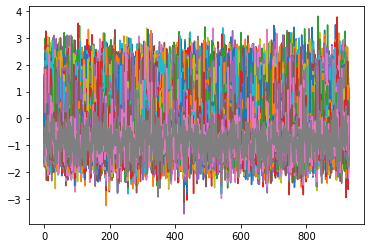

In [ ]:
plt.plot(X_train.reshape(930,128))